In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Download Bitcoin historical data from GitHub 
# Note: you'll need to select "Raw" to download the data in the correct format
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv 

--2022-10-21 19:24:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2022-10-21 19:24:20 (6.54 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [3]:
df = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', parse_dates=['Date'], index_col=['Date'])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
# How many samples do we have?
len(df)

2787

In [6]:
# we only want closing price for each day
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)':'Price'})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


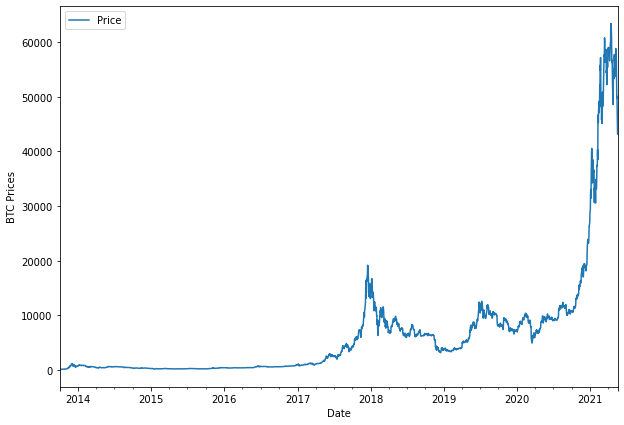

In [7]:
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel('BTC Prices')
plt.xlabel('Date')
plt.show()

In [8]:
import csv
from datetime import datetime

In [9]:
timesteps = []
btc_price = []

with open('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
    csv_reader = csv.reader(f, delimiter=',')
    next(csv_reader)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1], '%Y-%m-%d'))
        btc_price.append(float(line[2]))
        
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

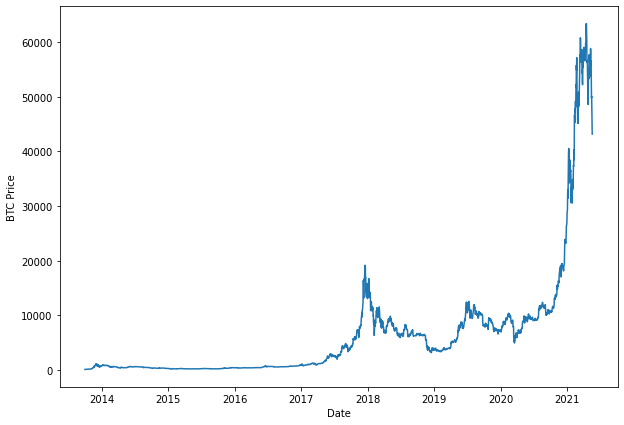

In [10]:
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.show()

## Creating train and test sets from timeseries data

In [11]:
# Get bitcoin array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:5], prices[:5]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866]))

In [12]:
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

# Create a plotting function

In [13]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel('Time')
    plt.ylabel('BTC Price')
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

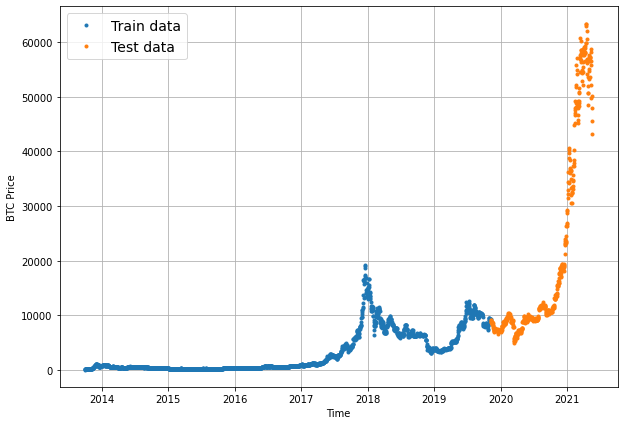

In [14]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label='Train data')
plot_time_series(timesteps=X_test, values=y_test, label='Test data')

## Modelling experiments

* horizon - number of timesteps to predict into future
* window - number of timesteps from past used to predict horizon

## Model 0: Naive forecast (Baseline)

One of the most common baseline models for timeseries forcasting, the naive model (also called the naive forecast), requires no training at all

That's because all the naive model does is use the previous timestep value to predict the next timestep value.

> A prediction at timestep `t` (y-hat) is equal to the value at t-1 `(the previous timestamp)`

In [15]:
# create a naive forecast
naive_forecast = y_test[:-1] # Naive forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # view the first and last 10

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

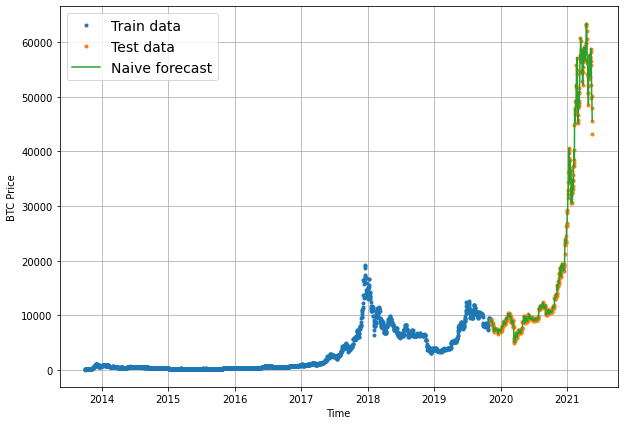

In [16]:
# Plot naive forecast
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label='Train data')
plot_time_series(timesteps=X_test, values=y_test, label='Test data')
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format='-', label='Naive forecast')

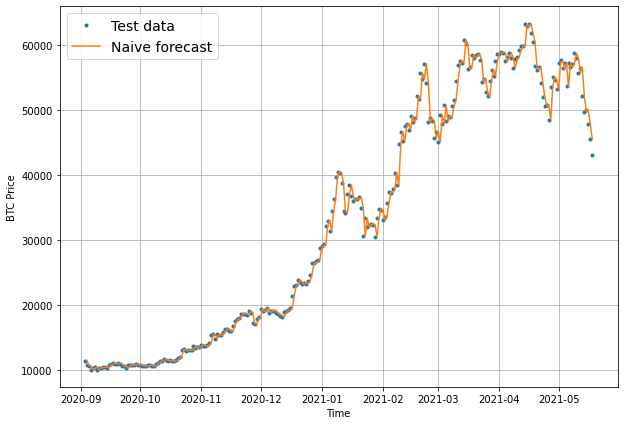

In [17]:
# Zoom in to take a better look
plt.figure(figsize=(10,7))
offset = 300
plot_time_series(X_test, y_test, start=offset, label='Test data')
plot_time_series(X_test[1:], naive_forecast, start=offset, label='Naive forecast', format='-')

In [18]:
# function to evaluate models
import tensorflow as tf

In [19]:
def mean_absolute_scaled_error(y_true, y_pred):
    """
    Implement MASE (assuming no seasonality of data)
    """
    
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
    
    return mae / mae_naive_no_season
    

In [20]:
def evaluate_preds(y_true, y_pred):
    # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    
    # calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    
    return {
        'mae': mae.numpy(),
        'mse': mse.numpy(),
        'rmse': rmse.numpy(),
        'mape': mape.numpy(),
        'mase': mase.numpy()
    }

In [21]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

2022-10-21 19:24:23.179925: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-21 19:24:23.180894: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-21 19:24:23.337913: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-21 19:24:23.338905: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-21 19:24:23.339725: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Formatting Data: Part 2

In [22]:
HORIZON = 1
WINDOW_SIZE = 7

In [23]:
def get_labelled_windows(x, horizon=1):
    """
    Creates labels for windowed dataset
    """
    
    return x[:, :-horizon], x[:, -horizon:]

In [24]:
# Test out the window labelling function
test_window , test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f'Window: {tf.squeeze(test_window).numpy()} -> Labels: {tf.squeeze(test_label).numpy()}')

Window: [1 2 3 4 5 6 7] -> Labels: 8


In [25]:
# Create function to view NumPy arrays as windows:
def make_windows(x, window_size=7, horizon=1):
    """
    Turns 1D array into a 2D array of sequential windows of window_size.
    """
    
    # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)
    print(f'Window step: \n {window_step}')
    
    # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
    print(f'Window indexes: \n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}')
    
    # 3. Index on the target array (timeseries) with 2D array of multiple window steps
    windowed_array = x[window_indexes]
    
    # 4. Get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
    
    return windows, labels

In [26]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step: 
 [[0 1 2 3 4 5 6 7]]
Window indexes: 
 (array([[0, 1, 2, 3, 4, 5, 6, 7],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [2, 3, 4, 5, 6, 7, 8, 9]]), array([[2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784],
       [2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785],
       [2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786]]), (2780, 8))


(2780, 2780)

In [27]:
full_windows[:5]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  ],
       [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
        125.96116],
       [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
        125.27966]])

In [28]:
full_labels[:5]

array([[123.033  ],
       [124.049  ],
       [125.96116],
       [125.27966],
       [125.9275 ]])

In [29]:
# Make the train test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    split_size = int(len(windows) * (1-test_split))
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [30]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [31]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [32]:
## Creating a model checkpoint
import os

def create_model_checkpoint(model_name, save_path='model_experiments'):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                             verbose=0,
                                             save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

In [33]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear') # linear activation is same as no activation
], name='model_1_dense')

model_1.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])

history_1 = model_1.fit(train_windows,
                       train_labels,
                       epochs=100,
                       verbose=0,
                        batch_size=128,
                       validation_data=(test_windows, test_labels),
                       callbacks=[create_model_checkpoint(model_name=model_1.name)])

2022-10-21 19:24:27.805742: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-21 19:24:30.204194: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [34]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 585.9758 - mae: 585.9758


[585.9757690429688, 585.9757690429688]

In [35]:
model_1 = tf.keras.models.load_model('model_experiments/model_1_dense')
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9510 - mae: 568.9510


[568.9510498046875, 568.9510498046875]

In [36]:
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)

In [37]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:5], model_1_preds.shape

(556,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=array([8861.71 , 8769.887, 9015.711, 8795.519, 8723.811], dtype=float32)>,
 TensorShape([556]))

In [38]:
model_1_results = evaluate_preds(tf.squeeze(test_labels), model_1_preds)
model_1_results

{'mae': 568.95105,
 'mse': 1171743.8,
 'rmse': 1082.4712,
 'mape': 2.5448983,
 'mase': 0.9994894}

In [39]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

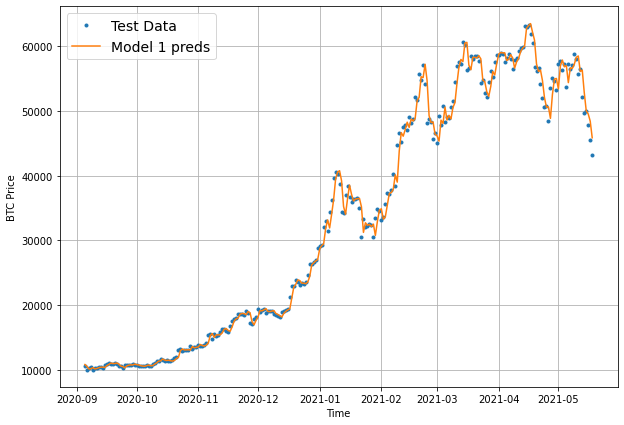

In [40]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label='Test Data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format='-', label='Model 1 preds')

## Model 2: Dense (Window = 30, Horizon = 1)

In [41]:
HORIZON=1
WINDOW_SIZE=30

In [42]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step: 
 [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30]]
Window indexes: 
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]]), array([[2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764,
        2765, 2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775,
        2776, 2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784],
       [2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765,
        2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776,
        2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785],
       [2756, 2757, 

(2757, 2757)

In [43]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2205, 2205, 552, 552)

In [44]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name='model_2_dense')

model_2.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])

history_2 = model_2.fit(train_windows,
                       train_labels,
                       verbose=0,
                       epochs=100,
                       validation_data=(test_windows, test_labels),
                       batch_size=128,
                       callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [45]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 659.3332 - mae: 659.3332


[659.3331909179688, 659.3331909179688]

In [46]:
model_2 = tf.keras.models.load_model(f'model_experiments/{model_2.name}/')
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 605.8741 - mae: 605.8741


[605.8740844726562, 605.8740844726562]

In [47]:
model_2_preds = make_preds(model_2, test_windows)

In [48]:
model_2_preds.shape, test_labels.shape

(TensorShape([552]), (552, 1))

In [49]:
model_2_results = evaluate_preds(tf.squeeze(test_labels), model_2_preds)
model_2_results

{'mae': 605.8741,
 'mse': 1273360.8,
 'rmse': 1128.4329,
 'mape': 2.726445,
 'mase': 1.0590738}

In [50]:
len(test_windows)

552

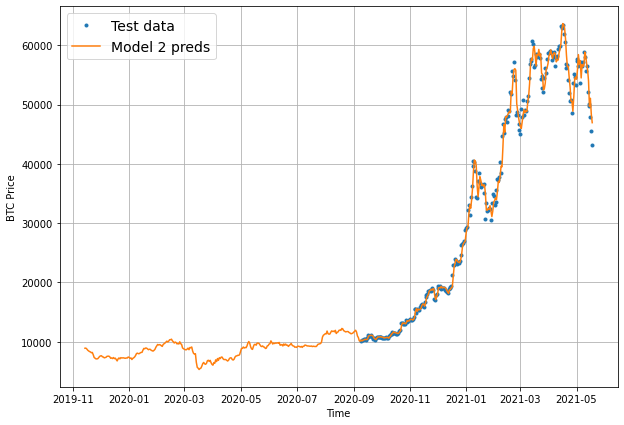

In [51]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label='Test data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, format='-', label='Model 2 preds')

## Model 3: Dense (window = 30, horizon = 7)

In [52]:
WINDOW_SIZE=30
HORIZON=7

In [53]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step: 
 [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36]]
Window indexes: 
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]]), array([[2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758,
        2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769,
        2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780,
        2781, 2782, 2783, 2784],
       [2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759,

(2751, 2751)

In [54]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2200, 2200, 551, 551)

In [55]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name='model_3_dense')

model_3.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])

history_3 = model_3.fit(train_windows,
                       train_labels,
                       epochs=100,
                       verbose=1,
                       batch_size=128,
                       validation_data=(test_windows, test_labels),
                       callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
18/18 [==============================] - 0s 9ms/step - loss: 1476.6752 - mae: 1476.6752 - val_loss: 3088.5613 - val_mae: 3088.5613
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 552.8943 - mae: 552.8943 - val_loss: 2462.4548 - val_mae: 2462.4548
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 435.1978 - mae: 435.1978 - val_loss: 2283.1484 - val_mae: 2283.1484
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 391.9787 - mae: 391.9787 - val_loss: 1975.1218 - val_mae: 1975.1218
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 357.9485 - mae: 357.9485 - val_loss: 2000.1556 - val_mae: 2000.1556
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 332.6704 - mae: 332.6704 - val_loss: 1723.4186 - val_mae: 1723.4186
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 309.9903 - mae: 309.9903 - val_loss: 1591.9688 - val_mae: 1591.9688
Epoch 8/100

In [56]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1300.1525 - mae: 1300.1525


[1300.1524658203125, 1300.1524658203125]

In [57]:
model_3 = tf.keras.models.load_model(f'model_experiments/{model_3.name}/')

In [58]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 1237.5065 - mae: 1237.5065


[1237.5064697265625, 1237.5064697265625]

In [59]:
model_3_preds = make_preds(model_3, test_windows)
model_3_preds[:5], model_3_preds.shape

(<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
 array([[9004.694 , 9048.1   , 9425.09  , 9258.256 , 9495.797 , 9558.453 ,
         9357.3545],
        [8735.506 , 8840.303 , 9247.793 , 8885.601 , 9097.186 , 9174.327 ,
         9156.819 ],
        [8672.508 , 8782.387 , 9123.857 , 8770.371 , 9007.13  , 9003.869 ,
         9042.725 ],
        [8874.399 , 8784.74  , 9043.902 , 8943.052 , 9033.477 , 9176.489 ,
         9039.677 ],
        [8825.891 , 8777.44  , 8926.78  , 8870.179 , 9213.232 , 9268.156 ,
         8942.487 ]], dtype=float32)>,
 TensorShape([551, 7]))

In [60]:
model_3_results = evaluate_preds(tf.squeeze(test_labels), model_3_preds)

# Make our evaluation function work for larger horizons

In [61]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [62]:
model_3_results = evaluate_preds(tf.squeeze(test_labels), model_3_preds)
model_3_results

{'mae': 1237.5063,
 'mse': 5405198.5,
 'rmse': 1425.7477,
 'mape': 5.558879,
 'mase': 2.2020733}

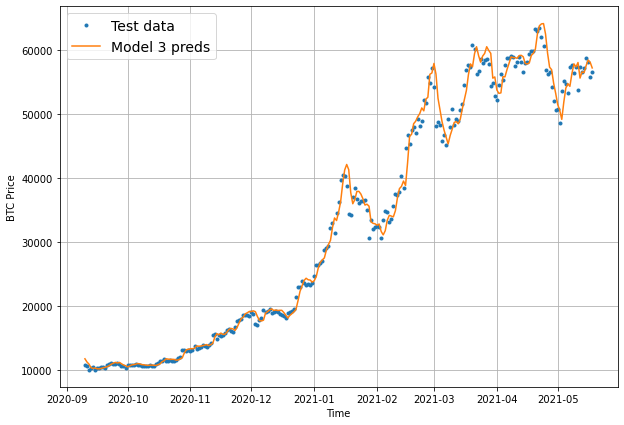

In [63]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label='Test data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), start=offset, format='-', label='Model 3 preds')

In [64]:
model_3_preds[:2], model_3_preds.shape, tf.reduce_mean(model_3_preds, axis=1)[:2]

(<tf.Tensor: shape=(2, 7), dtype=float32, numpy=
 array([[9004.694 , 9048.1   , 9425.09  , 9258.256 , 9495.797 , 9558.453 ,
         9357.3545],
        [8735.506 , 8840.303 , 9247.793 , 8885.601 , 9097.186 , 9174.327 ,
         9156.819 ]], dtype=float32)>,
 TensorShape([551, 7]),
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([9306.821, 9019.647], dtype=float32)>)

<AxesSubplot:>

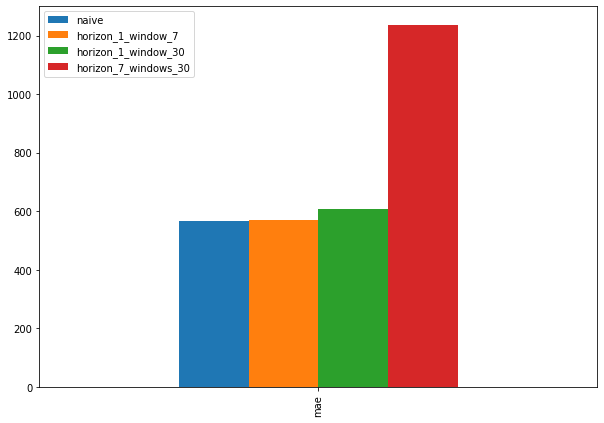

In [65]:
## Which of our models is performing the best so far
pd.DataFrame({
    'naive': naive_results['mae'],
    'horizon_1_window_7': model_1_results['mae'],
    'horizon_1_window_30': model_2_results['mae'],
    'horizon_7_windows_30': model_3_results['mae']
}, index=['mae']).plot(figsize=(10,7), kind='bar')

## Model 4: Conv1D

In [66]:
WINDOW_SIZE=7
HORIZON=1

In [67]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step: 
 [[0 1 2 3 4 5 6 7]]
Window indexes: 
 (array([[0, 1, 2, 3, 4, 5, 6, 7],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [2, 3, 4, 5, 6, 7, 8, 9]]), array([[2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784],
       [2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785],
       [2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786]]), (2780, 8))


(2780, 2780)

In [68]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

To use the Conv1D layer, we need an input shape of `(batch_size, timesteps, input_dim)`
So we need to reshape our data

In [69]:
# current data
train_windows[0].shape

(7,)

In [70]:
# before we pass our data into the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [71]:
expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`

In [72]:
# Test lambda layer
print(f'Original shape: {x.shape}')
print(f'Expanded shape: {expand_dims_layer(x).shape}')
print(f'Original values with expanded shape: {expand_dims_layer(x)}')

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape: [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [73]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5,
                           strides=1,
                           padding='causal',
                           activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name='model_4_conv1d')

model_4.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])

model_4.fit(train_windows,
           train_labels,
           batch_size=128,
           epochs=100,
           verbose=0,
           validation_data=(test_windows, test_labels),
           callbacks=[create_model_checkpoint(model_name=model_4.name)])

2022-10-21 19:25:58.778246: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


In [74]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 1, 7)              0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1, 128)            4608      
_________________________________________________________________
dense_6 (Dense)              (None, 1, 1)              129       
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [75]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 610.1541 - mae: 610.1541


[610.154052734375, 610.154052734375]

In [76]:
model_4 = tf.keras.models.load_model(f'model_experiments/{model_4.name}/')

In [77]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.8284 - mae: 570.8284


[570.828369140625, 570.828369140625]

In [78]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8851.464, 8754.47 , 8983.927, 8759.671, 8703.627], dtype=float32)>

In [79]:
model_4_results = evaluate_preds(tf.squeeze(test_labels), model_4_preds)
model_4_results

{'mae': 570.82837,
 'mse': 1176671.2,
 'rmse': 1084.7448,
 'mape': 2.5593357,
 'mase': 1.0027874}

## Model 5: RNN (LSTM)

In [80]:
from tensorflow.keras import layers

In [81]:
# Let's build an LSTM model with the functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation='relu')(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, outputs, name='model_5_LSTM')

model_5.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])

history_5 = model_5.fit(train_windows,
           train_labels,
           epochs=100,
           verbose=0,
           batch_size=128,
           validation_data=(test_windows,test_labels),
           callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [82]:
model_5 = tf.keras.models.load_model(f'model_experiments/{model_5.name}/')
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 598.4156 - mae: 598.4156


[598.4156494140625, 598.4156494140625]

In [83]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8965.354, 8835.616, 8975.375, 8772.289, 8748.687], dtype=float32)>

In [84]:
model_5_results = evaluate_preds(tf.squeeze(test_labels), model_5_preds)
model_5_results

{'mae': 598.4157,
 'mse': 1271503.8,
 'rmse': 1127.6097,
 'mape': 2.6813142,
 'mase': 1.0512507}

## Building a multivariate time series dataset

In [85]:
# Adding bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2020 - Not applicable for the current dataset
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64('2012-11-28')
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-11')

In [86]:
# get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [87]:
# Add block_reward_column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

# Set values of block reward column
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [88]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<AxesSubplot:xlabel='Date'>

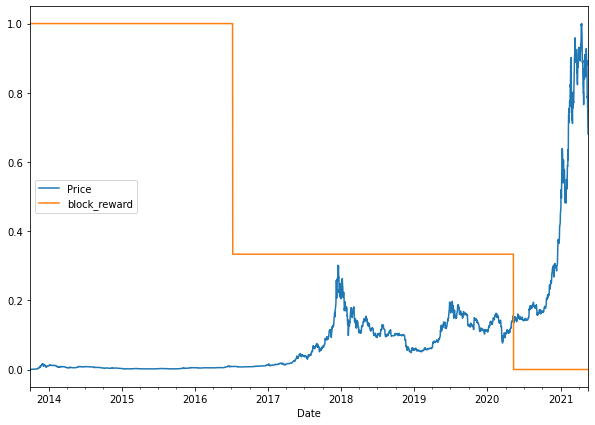

In [89]:
# Plot the block reward price over time
# Note: Because of different scales of our values, we'll scale them to be between 0 and 1

from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price', 'block_reward']]),
                                    columns=bitcoin_prices_block.columns,
                                    index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10,7))

In [90]:
## Making a windowed dataset with pandas

bitcoin_prices_windowed = bitcoin_prices_block.copy()

# add windowed columns
for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f'Price+{i+1}'] = bitcoin_prices_windowed['Price'].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [91]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [92]:
# Let's create X and y m remove tne NaN's and convert to float32 to prevent tensorflow errors
X = bitcoin_prices_windowed.dropna().drop('Price', axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [93]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [94]:
X.shape, y.shape, type(X), type(y)

((2780, 8), (2780,), pandas.core.frame.DataFrame, pandas.core.series.Series)

In [95]:
# Create train test splits manually
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 7

In [96]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_7_multi')

model_7.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])

history_7 = model_7.fit(X_train,
                       y_train,
                       verbose=0,
                       batch_size=128,
                       epochs=100,
                       validation_data=(X_test, y_test),
                       callbacks=[create_model_checkpoint(model_name=model_7.name)])

In [97]:
model_7.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 626.7449 - mae: 626.7449


[626.744873046875, 626.744873046875]

In [98]:
# Load the best performing model
model_7 = tf.keras.models.load_model(f'model_experiments/{model_7.name}/')

In [99]:
model_7.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.8910 - mae: 567.8910


[567.8909912109375, 567.8909912109375]

In [100]:
model_7_preds = make_preds(model_7, X_test)
model_7_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8844.684, 8769.905, 9045.17 , 8747.686, 8728.429], dtype=float32)>

In [101]:
y_test.shape

(556,)

In [102]:
model_7_results = evaluate_preds(y_test, model_7_preds)
model_7_results

{'mae': 567.8909,
 'mse': 1164817.6,
 'rmse': 1079.2672,
 'mape': 2.5460868,
 'mase': 0.9976271}

In [103]:
X_test.index

DatetimeIndex(['2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13',
               '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
               '2019-11-18', '2019-11-19',
               ...
               '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16',
               '2021-05-17', '2021-05-18'],
              dtype='datetime64[ns]', name='Date', length=556, freq=None)

## Model 8: N-BEATS algorithm

### Building and testing the N-BEATS block layer

In [104]:
# Creating N-beats custom layer
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self, input_size: int, theta_size: int, horizon: int, n_neurons: int, n_layers: int,
                **kwargs): #The **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers
        
        # Block contains stack of 4 fully connected layers each has relu activation
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
        # Output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear', name='theta')
        
    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        # Output the backcast and forecast from theta
        backcast, forecast = theta[:,:self.input_size], theta[:, -self.horizon:]
        return backcast, forecast

In [105]:
# setup dummy inpuys NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                      theta_size= WINDOW_SIZE + HORIZON, # backcast + forecast
                                       horizon = HORIZON,
                                       n_neurons = 128,
                                       n_layers = 4
                                      )

In [106]:
# Create dummy inputs (have to be the same size as input size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape of model has to reflect Dense layer input requirement (ndims=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [107]:
# Pass dummy inpuys to dummy NBeatsLayer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (They'll be random due to no training of the model)
print(f'Backcast: {tf.squeeze(backcast.numpy())}')
print(f'Forecast: {tf.squeeze(forecast.numpy())}')

Backcast: [ 0.19014993  0.83798355 -0.3287001   0.2515993  -0.47540283 -0.7783665
 -0.5299447 ]
Forecast: -0.7554212808609009


### Preparing data for the N-BEATS algorith using tf.data

To make our input data load as fast as possible we're going to be adhering to the performant data pipeline steps in the data.data guide

In [108]:
HORIZON = 1 # How far to predict
WINDOW_SIZE = 7 # How far to look back

In [109]:
# Create NBEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [110]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f'Price+{i+1}'] = bitcoin_prices_nbeats['Price'].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [111]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop('Price', axis=1)
y = bitcoin_prices_nbeats.dropna()['Price']

# Make train and test data sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [112]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_label_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_label_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_label_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_label_dataset))


# Batch and prefetch
BATCH_SIZE = 1024 # as used in the paper we are replicating
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset


(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

### Setting up hypermarameters for N-BEATS algorithm

The N-BEATS algorith has a fair few number of parameters, many of them can be found in table 18 of the paper

In [113]:
# Values from N-BEATS paper (Generic version, Daily data timeframe)
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections
Before we can craft our N-BEATS model, we need two layers for the residual connections (subtract and add)

The N-Beats algorithm uses double residual stacking to help train its deeper architecture (Section 3.2 of N-BEATS paper)

In [114]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# subtract
subtracted = tf.keras.layers.subtract([tensor_1, tensor_2])

# Add
added = tf.keras.layers.add([tensor_1, tensor_2])

# Get outputs
print(f'Input tensors: {tensor_1.numpy()} and {tensor_2.numpy()}')
print(f'Subtracted: {subtracted.numpy()}')
print(f'Added: {added.numpy()}')

Input tensors: [10 11 12 13 14 15 16 17 18 19] and [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


## Building, compiling and fitting the N-Beats algorithm

1. Setup an instance of N-BEATS block layer using `NBeatsBlock` (this'll be the initial block used for the network, the rest will be created as part of stacks.
2. Create an Input layer for the N-BEATS stack (we'll be using the keras functional API)
3. Make the Initial backcast and the forecast for the model with the layer created in (1)
4. Use for loop to create stacks of block layers.
5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks which return backcasts and block-level forecasts.
6. Create the double residual stacking using subtract and add layers.
7. Put the model inputs and outputs together using the tf.keras.Model()
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default setting as per section 5.2 of N-BEATS paper.
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so long, we'll use a couple of callbacks:
    - Early stopping - because the model will be training for so long, we'll stop it early if it stops improving.
    - Reduce LR on Plateau - if a model stops improving, try lowering the learning rate to reduce the amount it updates its weights each time. (Take smaller steps towards best performance)

In [115]:
%%time

tf.random.set_seed(42)
# 1. Setup an instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                theta_size=THETA_SIZE,
                                horizon=HORIZON,
                                n_neurons=N_NEURONS,
                                n_layers=N_LAYERS,
                                name='InitialBlock')

# 2. Create input to stack
stack_input = tf.keras.layers.Input(shape=(INPUT_SIZE), name='stack_input')

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

for i,_ in enumerate(range(N_STACKS-1)): # first stack is already created in 3
    
    # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
    backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                          theta_size=THETA_SIZE,
                                          horizon=HORIZON,
                                          n_neurons=N_NEURONS,
                                          n_layers=N_LAYERS,
                                          name=f'NBeatsBlock_{i}')(residuals) # pass the residuals
    
    # 6. Create the double residual stacking
    residuals = tf.keras.layers.subtract([residuals,backcast], name=f'subtract_{i}')
    forecast = tf.keras.layers.add([forecast, block_forecast], name=f'add_{i}')
    
# 7. Put the stack model to together
model_8 = tf.keras.Model(inputs=stack_input, outputs=forecast, name='model_8_NBeats')

# 8. Compile the model with MAE loss
model_8.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam())

# Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_8.fit(train_dataset,
           epochs=N_EPOCHS,
           validation_data=test_dataset,
           verbose=0,
           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=200,
                                                      restore_best_weights=True),
                     tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                         patience=100,
                                                         verbose=1)])


Epoch 00725: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 01002: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 01102: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 2min 41s, sys: 5.3 s, total: 2min 46s
Wall time: 3min 33s


In [116]:
model_8.evaluate(test_dataset)

1/1 [==============================] - 0s 21ms/step - loss: 574.1027


574.1027221679688

In [117]:
model_8_preds = make_preds(model_8, test_dataset)
model_8_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8844.237, 8765.715, 9006.934, 8762.396, 8738.931, 8730.598,
       8650.172, 8489.312, 8463.903, 8498.88 ], dtype=float32)>

In [118]:
model_8_results = evaluate_preds(y_test, model_8_preds)
model_8_results

{'mae': 574.1027,
 'mse': 1175416.6,
 'rmse': 1084.1664,
 'mape': 2.6110923,
 'mase': 1.0085394}

In [119]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [120]:
model_1_results

{'mae': 568.95105,
 'mse': 1171743.8,
 'rmse': 1082.4712,
 'mape': 2.5448983,
 'mase': 0.9994894}

### Plot the N-BEATS architecture we've created

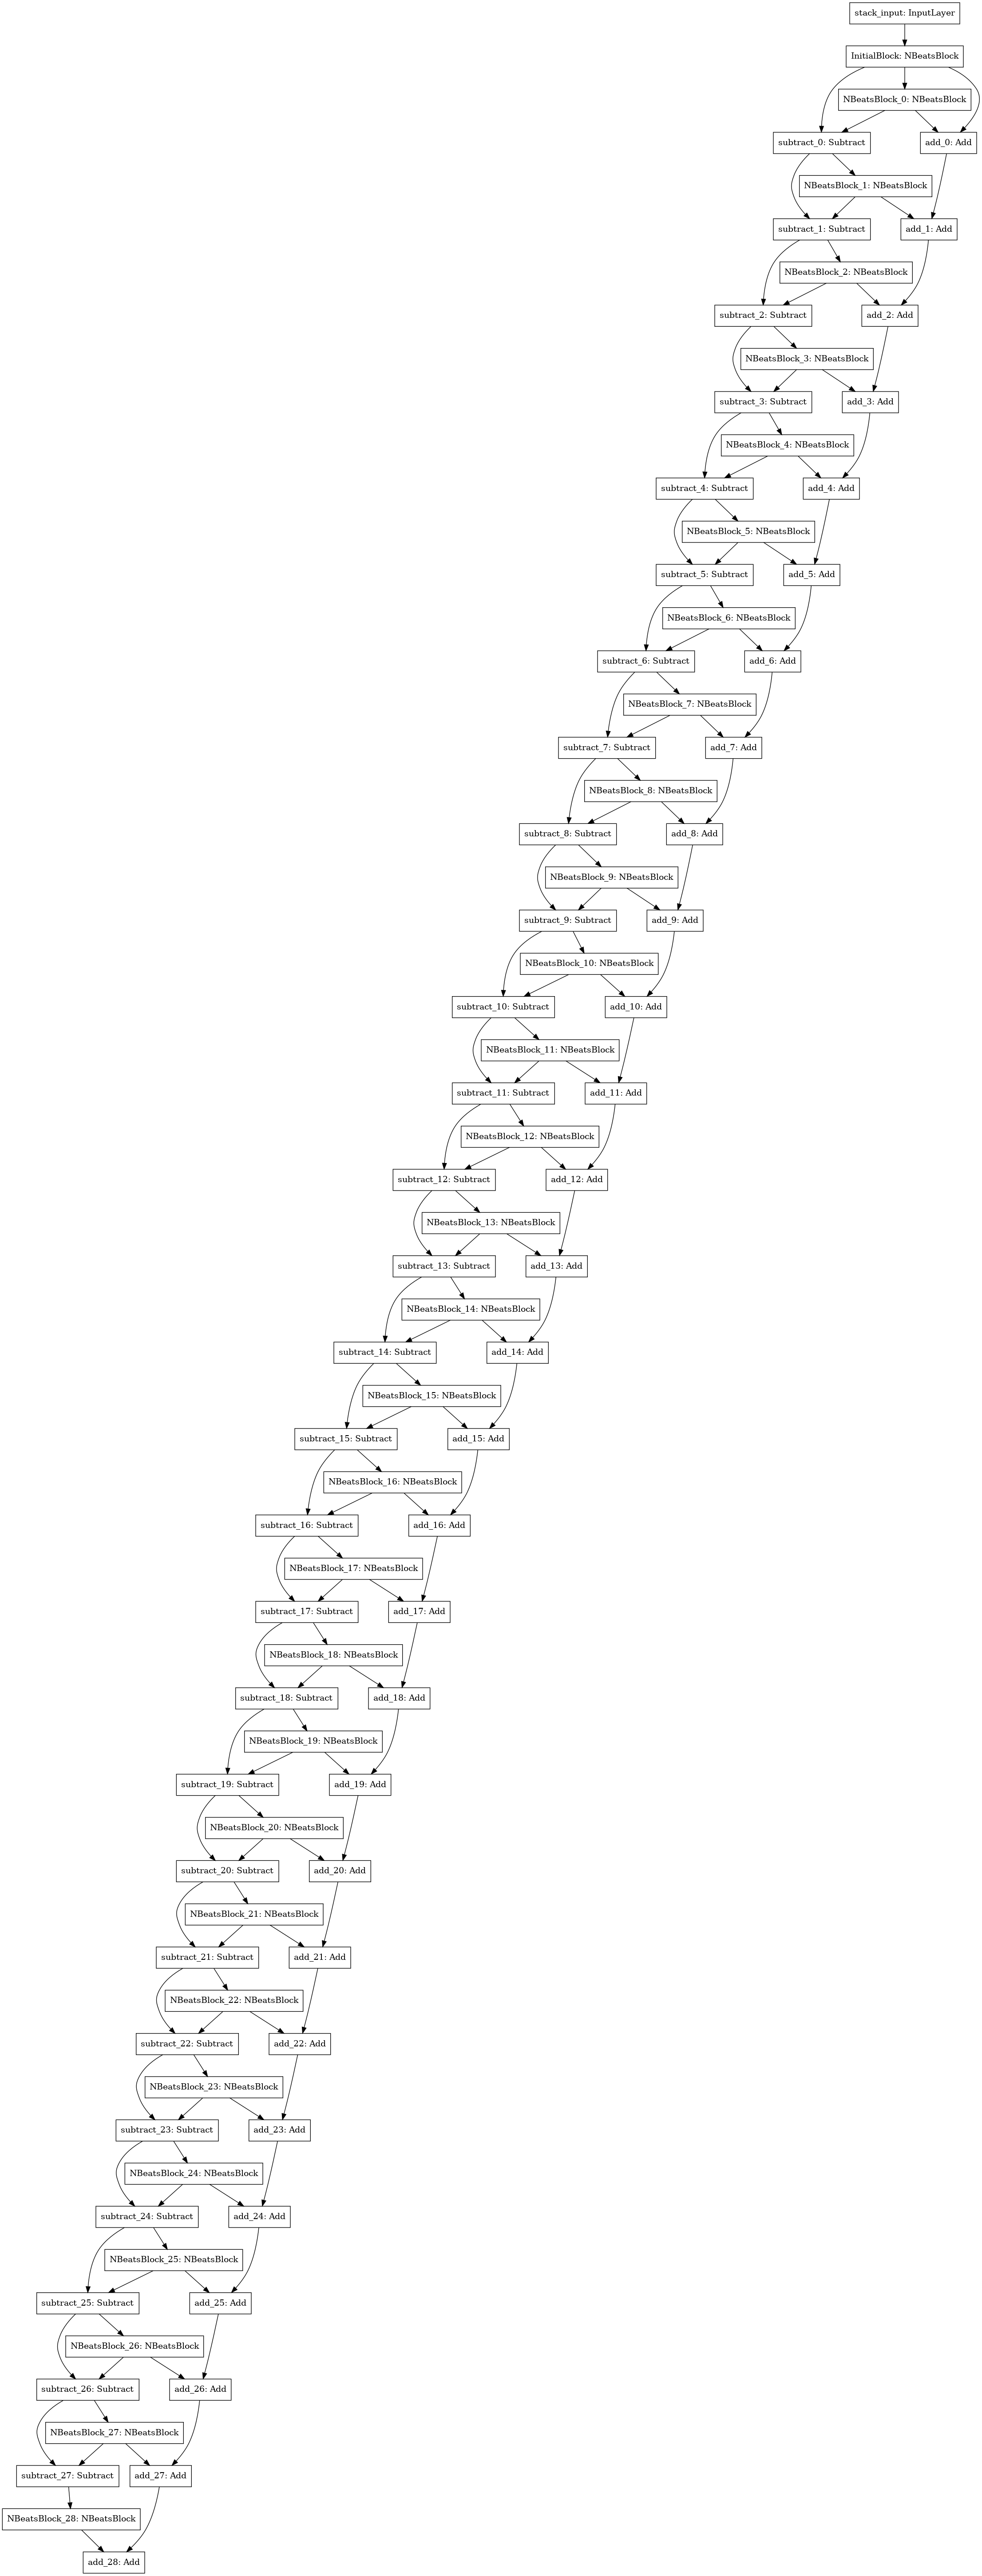

In [121]:
from tensorflow.keras.utils import plot_model
plot_model(model_8)

## Model 9: Creating an ensemble (stacking different models togther)

An ensemble leverages the wisdom of the crowd effect.

I combines many different models to predict a common goal.

In [122]:
HORIZON, WINDOW_SIZE

(1, 7)

In [123]:
def get_ensemble_model(horizon=HORIZON,
                      train_data=train_dataset,
                      test_data=test_dataset,
                      num_iter=10,
                      num_epochs=1000,
                      loss_fns=['mae', 'mse', 'mape']):
    """
    Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.
    
    For example, if num_ter = 10, a list of 30 trained models will be returned:
    10 * len(['mae', 'mse', 'mape'])
    """
    
    # Make empty list for trained ensemble model
    ensemble_models = []
    
    # Create num_iter number of models per loss function
    for i in range(num_iter):
        for loss_function in loss_fns:
            print(f'Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number {i}')
            
            # Construce a simple model (similar to model1)
            model = tf.keras.Sequential([
                # Initialize dense dense layers with normal distribution for estimating prediction intervals later on
                tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
                tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
                tf.keras.layers.Dense(horizon)
            ])
            
            # compile simple model with current loss
            model.compile(loss=loss_function,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=['mae', 'mse'])
            
            # Fit the current model
            model.fit(train_dataset,
                     epochs=num_epochs,
                     validation_data=test_dataset,
                     verbose=0,
                     callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                               patience=200,
                                                               restore_best_weights=True),
                               tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                   patience=100,
                                                                   verbose=1)])
            
            # append fitted model to list of ensemble models
            ensemble_models.append(model)
    return ensemble_models

In [124]:
%%time
# Get list of trained ensembled models
ensemble_models = get_ensemble_model(num_iter=5,
                                     num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number 0

Epoch 00830: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00942: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number 0

Epoch 00609: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00724: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00824: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mape for 1000 epochs, model number 0

Epoch 00168: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00268: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number 1

Epoch 00921: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number 1

Epoch 00409:

In [125]:
len(ensemble_models)

15

In [126]:
ensemble_models

### Make predictions with ensemble models

In [127]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
    ensemble_preds = []
    for model in ensemble_models:
        preds = model.predict(data)
        ensemble_preds.append(preds)
    return tf.constant(tf.squeeze(ensemble_preds))

In [128]:
# Create a list of ensemble predictions

ensemble_preds = make_ensemble_preds(ensemble_models, test_dataset)
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8801.951 ,  8773.378 ,  9037.543 , ..., 50193.434 , 49210.05  ,
        46543.402 ],
       [ 8760.862 ,  8738.046 ,  9051.922 , ..., 49338.19  , 48504.613 ,
        45306.984 ],
       [ 8745.424 ,  8733.034 ,  9101.386 , ..., 49267.164 , 47660.426 ,
        45370.047 ],
       ...,
       [ 8930.092 ,  8761.5625,  9027.712 , ..., 49338.547 , 49614.33  ,
        46413.18  ],
       [ 8722.359 ,  8801.012 ,  9096.248 , ..., 49549.54  , 48488.945 ,
        45037.86  ],
       [ 8815.368 ,  8759.666 ,  9039.025 , ..., 49711.68  , 48046.5   ,
        45818.91  ]], dtype=float32)>

In [129]:
# Evaluate ensemble model predictions
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8793.23 , 8780.6  , 9065.92 , 8728.742, 8744.743, 8711.854,
       8669.312, 8480.969, 8455.8  , 8528.799], dtype=float32)>

In [130]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8793.759, 8775.392, 9051.922, 8714.227, 8737.862, 8720.733,
       8670.111, 8478.887, 8454.896, 8526.132], dtype=float32)

In [131]:
ensemble_results_mean = evaluate_preds(y_test, ensemble_mean)
ensemble_results_median = evaluate_preds(y_test, ensemble_median)

print(ensemble_results_mean)
print('\n')
ensemble_results_median

{'mae': 567.0673, 'mse': 1145982.5, 'rmse': 1070.5057, 'mape': 2.5808508, 'mase': 0.99618024}




{'mae': 567.16547,
 'mse': 1145647.6,
 'rmse': 1070.3492,
 'mape': 2.585575,
 'mase': 0.9963526}

In [132]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

### Plotting the prediction intervals (Uncertainty estimates) of our ensemble

So far we've been making point predictions with our models.

Eg. horizon = 1, our model predicts tomorrow's price of Bitcoin will be $50,000 USD

Wouldn't it be helpful if we knew a range of where that prediction came from?

Instead of 50,000 USD on the dot, how about `$48,000` to `$52,000`

Oneway to get the 95% confidence prediction intervals for deep learning model is the bootstrap method:

1. Take the predictions for a number of randomly initialized models (We've got this thanks to our ensemble models)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observations fall within 1.96 standard deviations of the mean).
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)

Refer the uber engineering neural network uncertainty estimation article

In [133]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks
  
  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)
  
  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96 

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95% 
lower, upper = get_upper_lower(preds=ensemble_preds)

In [134]:
ensemble_preds.shape

TensorShape([15, 556])

In [135]:
p_mean = tf.reduce_mean(ensemble_preds, axis=0)
p_mean.shape

TensorShape([556])

In [136]:
# Get the lower and upper bounds of the 95% prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)
lower[:5], upper[:5]

(<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8696.937, 8714.234, 8999.691, 8636.304, 8665.37 ], dtype=float32)>,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=array([8889.524, 8846.965, 9132.148, 8821.181, 8824.116], dtype=float32)>)

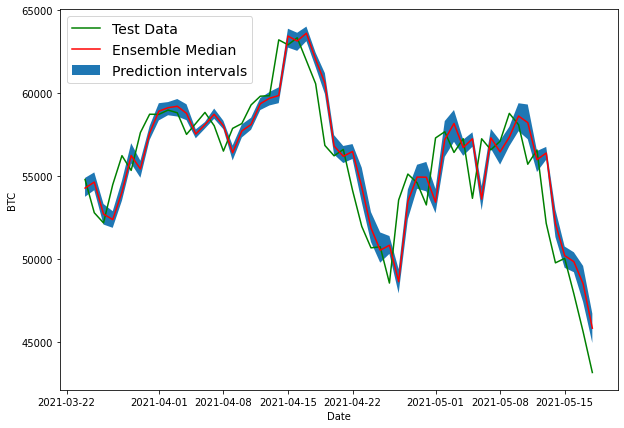

In [137]:
# Get the median, mean value of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)
# Median is more robust tha mean 

# Theoretically, the effect is unbounded because we could force the mean to be any value we choose by adjusting one value in the dataset. The breakdown point for the mean is 1/n. The mean is not a robust statistic. Conversely, the median is a robust statistic because it has a breakdown point of 50%.
offset = 500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:], y_test[offset:], 'g', label='Test Data')
plt.plot(X_test.index[offset:], ensemble_median[offset:], 'r-', label='Ensemble Median')
plt.xlabel('Date')
plt.ylabel('BTC')
# to plot the upper and lower bound use fill_between
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:], 
                 (upper)[offset:],
                 label='Prediction intervals')
plt.legend(loc='upper left', fontsize=14)


## Model 10: Future prediction model

In [138]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [139]:
# Train model on entire add_prefixdata to make predictions for next day
X_all = bitcoin_prices_windowed.drop(['Price', 'block_reward'], axis=1).dropna().to_numpy()
y_all = bitcoin_prices_windowed['Price'].dropna().to_numpy()

len(X_all), len(y_all)

(2780, 2787)

In [169]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>

In [170]:
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name='model_10_future_predict')

model_10.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

history_10 = model_10.fit(dataset_all,
                         epochs=100,
                         verbose=1)

Epoch 1/100
3/3 [==============================] - 0s 4ms/step - loss: 2821.9209
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 522.6333
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 1666.6752
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 1565.8127
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 556.1096
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 764.2935
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 982.0283
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 496.7997
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 469.5697
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 580.7074
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 279.5841
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 425.8925
Epoch 13/100
3/3 [================

### Make predictions into future

In [185]:
# How many steps to predict into the future?
INTO_FUTURE = 14

TO make predictions into the future we want a function which:

1. Takes as input:
    * a list of values (Bitcoin historical data)
    * a trained model (model 10)
    * a window int the future to preict (`INTO_FUTURE`)
    * The window size a model was trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on
2. Craetes an empty list for future forecasts (this will be returned at the end of the function) and extracts the last `WINDOW_SIZE` variable value from input_values. (Prediction will start from the last `WINDOW_SIZE` values of the training data)
3. Loop `INTO_FUTURE` time making prediction on `WINDOW_SIZE` datasets which update to remove the first value and append the last prediction.
    * Eventually future predictions will be made using models own predictions as inputs.

In [186]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [187]:
# Make forecasts into the future
future_forecast = make_future_forecast(values=y_all,
                                      model=model_10,
                                      into_future=INTO_FUTURE,
                                      window_size=WINDOW_SIZE)

Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 43788.14453125

Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 43788.14453125] -> Prediction: 43695.28125

Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 43788.14453125 43695.28125   ] -> Prediction: 43723.25

Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 43788.14453125 43695.28125    43723.25      ] -> Prediction: 43910.2890625

Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 43788.14453125
 43695.28125    43723.25       43910.2890625 ] -> Prediction: 43874.765625

Predicting on: 
 [45604.61575361 43144.47129086 43788.14453125 43695.28125
 43723.25       43910.2890625  43874.765625  ] -> Prediction: 44000.37890625

Predicting on: 
 [43144.47129086 43788.14453125 43695.28125    43723.25
 43910.

In [188]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


### Plot future forecasts

In [189]:
future_forecast

[43788.145,
 43695.28,
 43723.25,
 43910.29,
 43874.766,
 44000.38,
 44105.996,
 44190.33,
 44300.33,
 44396.684,
 44495.445,
 44597.34,
 44696.613,
 44797.46]

In [190]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [191]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [192]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [193]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 43788.145, 43695.28 , 43723.25 , 43910.29 , 43874.766,
        44000.38 , 44105.996, 44190.33 , 44300.33 , 44396.684, 44495.445,
        44597.34 , 44696.613, 44797.46 ], dtype=float32))

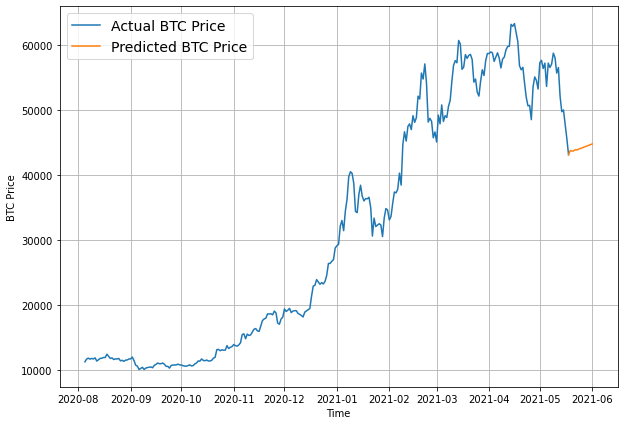

In [194]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Model 11: Why forecasting is BS (The turkey problem 🦃 )

In [200]:
# Let's introduce a turkey problem to our BTC data (Price of BTC falls a 100x in one day)

btc_price_turkey = btc_price.copy()
btc_price_turkey[:5], len(btc_price_turkey)

([123.65499, 125.455, 108.58483, 118.67466, 121.33866], 2787)

In [201]:
# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-1] = btc_price_turkey[-1] / 100
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [202]:
# Get the timesteps for our turkey proble,
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

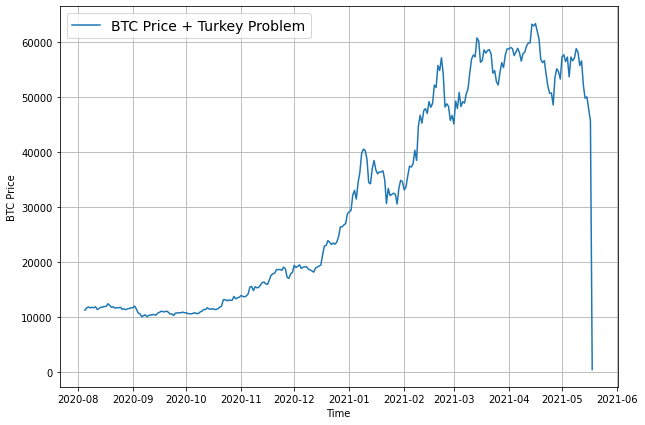

In [203]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey,
                values=btc_price_turkey,
                start=2500,
                format='-',
                 label='BTC Price + Turkey Problem'
                )

In [204]:
WINDOW_SIZE=7
HORIZON=1

In [206]:
# Create train and test sets for the turkey problem
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(y_train), len(X_test), len(y_test)

Window step: 
 [[0 1 2 3 4 5 6 7]]
Window indexes: 
 (array([[0, 1, 2, 3, 4, 5, 6, 7],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [2, 3, 4, 5, 6, 7, 8, 9]]), array([[2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784],
       [2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785],
       [2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786]]), (2780, 8))


(2224, 2224, 556, 556)

In [207]:
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name='turkey_problem_model')

model_11.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

model_11.fit(X_train,
            y_train,
            epochs=100,
            verbose=0,
            validation_data = (X_test, y_test),
            callbacks=[create_model_checkpoint(model_11.name)])

In [208]:
model_11.evaluate(X_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 687.1048


687.1047973632812

In [209]:
model_11 = tf.keras.models.load_model('model_experiments/turkey_problem_model')
model_11.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 641.2656


641.265625

In [210]:
model_11_preds = make_preds(model_11, X_test)
model_11_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8811.684, 8781.569, 9037.344, 8725.126, 8743.822], dtype=float32)>

In [211]:
model_11_results = evaluate_preds(y_test, model_11_preds)
model_11_results

{'mae': 17128.58,
 'mse': 614353540.0,
 'rmse': 23712.61,
 'mape': 121.35214,
 'mase': 26.506533}

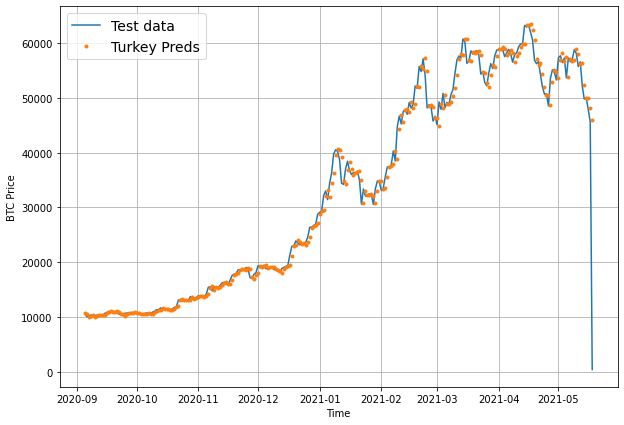

In [220]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):], values=btc_price_turkey[-len(y_test):], format='-', start=offset, label='Test data')
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):], values=model_11_preds
                 , start=offset, label='Turkey Preds')
plt.show()

## Compare different model results

In [227]:
# Compare different model results
model_results = pd.DataFrame({
    'naive_model': naive_results,
    'model_1': model_1_results,
        'model_2': model_2_results,
        'model_3': model_3_results,
        'model_4': model_4_results,
        'model_5': model_5_results,
        'model_7': model_7_results,
        'model_8': model_8_results,
        'model_9': ensemble_results_median,
        'model_11': model_1_results,
}).T
model_results

,mae,mse,rmse,mape,mase
naive_model,567.980225,1147547.000,1071.236206,2.516525,0.999570
model_1,568.951050,1171743.750,1082.471191,2.544898,0.999489
model_2,605.874084,1273360.750,1128.432861,2.726445,1.059074
model_3,1237.506348,5405198.500,1425.747681,5.558879,2.202073
model_4,570.828369,1176671.250,1084.744751,2.559336,1.002787
model_5,598.415710,1271503.750,1127.609741,2.681314,1.051251
model_7,567.890930,1164817.625,1079.267212,2.546087,0.997627
model_8,574.102722,1175416.625,1084.166382,2.611092,1.008539
model_9,567.165466,1145647.625,1070.349243,2.585575,0.996353
model_11,568.951050,1171743.750,1082.471191,2.544898,0.999489


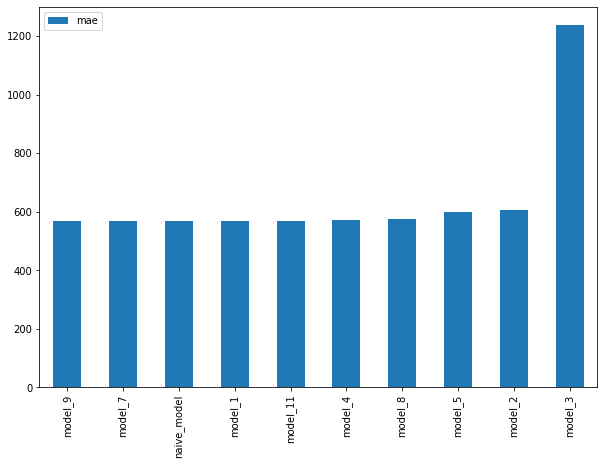

In [234]:
# Sort model results by mae and plot them
model_results[['mae']].sort_values(by='mae').plot(figsize=(10,7), kind='bar')
plt.show()